In [ ]:
import os
def main():
    
    print("Current Working Directory " , os.getcwd())
    
    
    try:
        # Change the current working Directory    
        os.chdir("/home/varun/temp")
        print("Directory changed")
    except OSError:
        print("Can't change the Current Working Directory")        
    print("Current Working Directory " , os.getcwd())
    
    # Check if New path exists
    if os.path.exists("/home/varun/temp") :
        # Change the current working Directory    
        os.chdir("/home/varun/temp")
    else:
        print("Can't change the Current Working Directory")    
        
    
    print("Current Working Directory " , os.getcwd())
    
if __name__ == '__main__':
    main()

In [ ]:
print('Hello World!')

In [ ]:
import numpy as np
def square(x):
    return x * x
x = np.random.randint(1, 10)
y = square(x)
print('%d squared is %d' % (x, y))

In [ ]:
import numpy as np
def square(x):
    return x * x

In [ ]:
import time
time.sleep(3)

In [ ]:
def say_hello(recipient):
    return 'Hello, {}!'.format(recipient)

say_hello('Tim')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style="darkgrid")

In [ ]:
df = pd.read_csv('fortune500.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.columns = ['ID','PRODID','PARTNAME','BOARDNAME','SHORTNAME','ZYNQFLASHTYP','FPGAFLASHTYP','PCB_REV','DDR_SIZE','FLASH_SIZE','EMMC_SIZE','OTHERS','NOTES','DESIGN']

In [ ]:
len(df)

In [ ]:
df.dtypes

In [ ]:
non_numberic_profits = df.SHORTNAME.str.contains('[^0-9.-]')
df.loc[non_numberic_profits].head()

In [ ]:
set(df.SHORTNAME[non_numberic_profits])

In [ ]:
%pwd

In [ ]:
%lsmagic

In [ ]:
%run hehe.py 


In [ ]:
%store

In [ ]:
%timeit %run hehe.py

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg' # 渲染矢量图使图片更加清晰

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.arange(20)
y=x**(2)
plt.plot(x,y)

In [ ]:
%lsmagic

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
x = np.arange(0,20,0.1)
y=np.sin(2*x*3.14)
plt.plot(x,y)

In [ ]:
pdb

In [1]:
# For drawing the MNIST digits as well as plots to help us evaluate performance we
# will make extensive use of matplotlib
from matplotlib import pyplot as plt

# All of the Keras datasets are in keras.datasets
from tensorflow.keras.datasets import mnist

# Keras has already split the data into training and test data
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Training images is a list of 60,000 2D lists.
# Each 2D list is 28 by 28—the size of the MNIST pixel data.
# Each item in the 2D array is an integer from 0 to 255 representing its grayscale
# intensity where 0 means white, 255 means black.
print(len(training_images), training_images[0].shape)

# training_labels are a value between 0 and 9 indicating which digit is represented.
# The first item in the training data is a 5
print(len(training_labels), training_labels[0])


60000 (28, 28)
60000 5


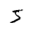

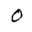

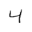

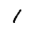

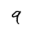

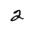

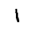

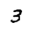

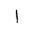

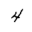

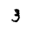

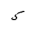

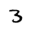

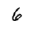

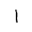

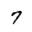

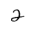

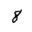

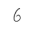

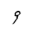

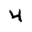

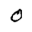

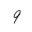

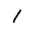

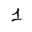

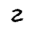

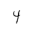

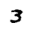

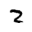

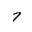

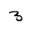

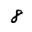

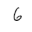

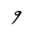

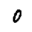

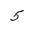

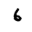

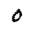

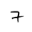

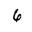

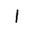

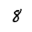

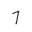

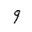

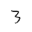

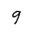

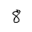

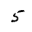

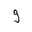

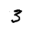

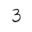

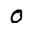

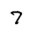

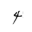

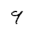

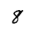

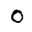

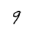

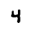

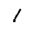

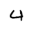

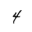

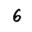

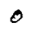

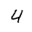

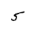

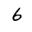

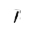

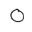

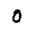

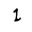

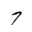

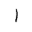

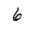

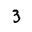

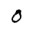

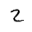

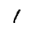

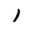

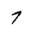

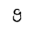

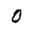

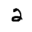

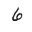

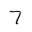

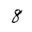

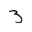

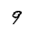

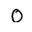

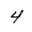

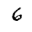

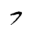

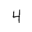

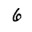

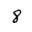

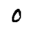

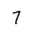

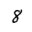

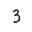

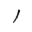

In [3]:
# Lets visualize the first 100 images from the dataset
for i in range(100):
    ax = plt.subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(training_images[i], cmap='Greys')
    plt.show()

In [4]:
from tensorflow.keras.utils import to_categorical

# Preparing the dataset
# Setup train and test splits
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()


# 28 x 28 = 784, because that's the dimensions of the MNIST data.
image_size = 784

# Reshaping the training_images and test_images to lists of vectors with length 784
# instead of lists of 2D arrays. Same for the test_images
training_data = training_images.reshape(training_images.shape[0], image_size) 
test_data = test_images.reshape(test_images.shape[0], image_size)

# [
#     [1,2,3]
#     [4,5,6]
# ]

# => [1,2,3,4,5,6]

# Just showing the changes...
print("training data: ", training_images.shape, " ==> ", training_data.shape)
print("test data: ", test_images.shape, " ==> ", test_data.shape)

training data:  (60000, 28, 28)  ==>  (60000, 784)
test data:  (10000, 28, 28)  ==>  (10000, 784)


In [5]:
# Create 1-hot encoded vectors using to_categorical
num_classes = 10 # Because it's how many digits we have (0-9) 

# to_categorical takes a list of integers (our labels) and makes them into 1-hot vectors
training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [6]:
print(training_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Sequential models are a series of layers applied linearly.
model = Sequential()

# The first layer must specify it's input_shape.
# This is how the first two layers are added, the input layer and the hidden layer.
model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))

# This is how the output layer gets added, the 'softmax' activation function ensures
# that the sum of the values in the output nodes is 1. Softmax is very
# common in classification networks. 
model.add(Dense(units=num_classes, activation='softmax'))

# This function provides useful text data for our network
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [8]:
# sgd stands for stochastic gradient descent.
# categorical_crossentropy is a common loss function used for categorical classification.
# accuracy is the percent of predictions that were correct.
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])

# The network will make predictions for 128 flattened images per correction.
# It will make a prediction on each item in the training set 5 times (5 epochs)
# And 10% of the data will be used as validation data.
history = model.fit(training_data, training_labels, batch_size=128, epochs=5, verbose=True, validation_split=.1)

Epoch 1/5
422/422 [==============================] - 1s 2ms/step - loss: 1.4347 - accuracy: 0.6453 - val_loss: 0.9791 - val_accuracy: 0.8332
Epoch 2/5
422/422 [==============================] - 1s 1ms/step - loss: 0.8706 - accuracy: 0.8254 - val_loss: 0.6813 - val_accuracy: 0.8757
Epoch 3/5
422/422 [==============================] - 1s 1ms/step - loss: 0.6740 - accuracy: 0.8564 - val_loss: 0.5486 - val_accuracy: 0.8953
Epoch 4/5
422/422 [==============================] - 1s 1ms/step - loss: 0.5753 - accuracy: 0.8704 - val_loss: 0.4793 - val_accuracy: 0.8978
Epoch 5/5
422/422 [==============================] - 1s 1ms/step - loss: 0.5166 - accuracy: 0.8801 - val_loss: 0.4443 - val_accuracy: 0.9043


313/313 [==============================] - 0s 679us/step - loss: 0.4893 - accuracy: 0.8862


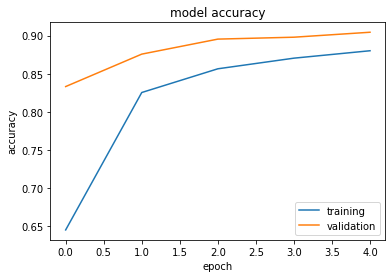

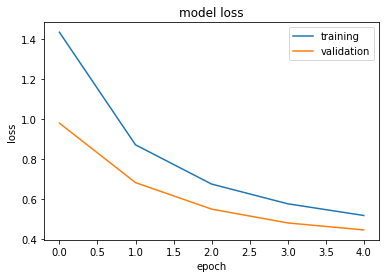

Test loss: 0.489
Test accuracy: 0.886


In [9]:
loss, accuracy  = model.evaluate(test_data, test_labels, verbose=True)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')

plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [10]:
from numpy import argmax

# Predicting once, then we can use these repeatedly in the next cell without recomputing the predictions.
predictions = model.predict(test_data)

# For pagination & style in second cell
page = 0
fontdict = {'color': 'black'}

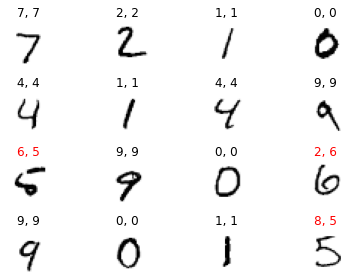

In [11]:
# Repeatedly running this cell will page through the predictions
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    ax.axis('off')
    plt.imshow(test_images[i + page], cmap='Greys')
    prediction = argmax(predictions[i + page])
    true_value = argmax(test_labels[i + page])

    fontdict['color'] = 'black' if prediction == true_value else 'red'
    plt.title("{}, {}".format(prediction, true_value), fontdict=fontdict)

page += 16
plt.tight_layout()
plt.show()

In [12]:
import tensorflow as tf
import numpy as np

print(np.__version__)              # should be 1.17+
print(tf.__version__)              # should be 2.0+

1.18.5
2.3.1
